In [1]:
%matplotlib inline

In [2]:
import gym
import math
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers

In [3]:
MAX_STEPS = 20
game = 'Pong-v0'
path = f'/tmp/gym-{game}'

In [10]:
env = gym.make(game)
env = env.unwrapped

print(env.get_action_meanings())
print(env.action_space)
print(env.observation_space)
print(env.action_space.n)
print(env.observation_space.shape[0])
print(env.observation_space.high)
print(env.observation_space.low)

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']
Discrete(6)
Box(210, 160, 3)
6
210
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

(210, 160, 3) 210


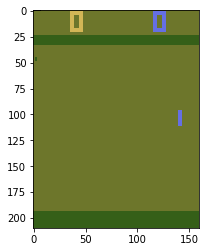

In [22]:
env = gym.make('Pong-v0')
observation = env.reset()
arr = env.render(mode='rgb_array')
plt.imshow(arr)
print(observation.shape, observation.shape[0])

In [16]:
def pong_transform(x):
    x = x[35:195]  # crop
    x[x == 144] = 0  # erase background (background type 1)
    x[x == 109] = 0  # erase background (background type 2)
    x[x != 0] = 1  # everything else (paddles, ball) just set to 1
    if False:
        x = x.ravel()
    else:
        x = np.expand_dims(x, -1)
    return x.astype(np.float32)

In [19]:
# pong_transform(observation).shape

(160, 160, 3, 1)

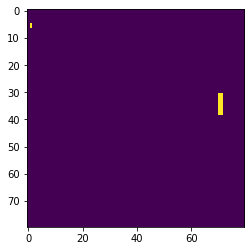

In [24]:
obs = observation
obs = obs[35:195]  # crop
obs = obs[::2, ::2, 0]  # downsample by factor of 2
obs[obs == 144] = 0  # erase background (background type 1)
obs[obs == 109] = 0  # erase background (background type 2)
obs[obs != 0] = 1  # everything else (paddles, ball) just set to 1
plt.imshow(obs)

In [8]:
env = gym.make(game)
for i_episode in range(2):
    observation = env.reset()
    for t in range(10):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print(observation, action, reward)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]

 [[236 236 236]
  [236 236 236]
  [236 236 236]
  ...
  [236 236 236]
  [236 236 236]
  [236 236 236]]] 0 0.0
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 [[144  72  17]
  [144  72  17]
  [144  72  17]
  ...
  [144  72  17]
  [144  72  17]
  [144  72  17]]

 ...

 [[236 236 236]
  [236 236 236]
  [236 236 236

In [11]:
env = gym.make(game)
env = wrappers.Monitor(env, path, force=True)
for i_episode in range(10):
    observation = env.reset()
    for t in range(MAX_STEPS):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
    else:
        print('MAX_STEPS: %d' % MAX_STEPS) 
        env.stats_recorder.save_complete()
        env.stats_recorder.done = True
env.close()

MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
MAX_STEPS: 20
